# Churn Prediction

## Importing libraries

In [358]:
!pip install pandas numpy matplotlib

In [359]:
!pip install seaborn scipy missingno

In [417]:
!pip install scikit-learn xgboost catboost

428781.60s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.1/27.1 MB 9.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 35.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 44.2 MB/s eta 0:00:0000:010:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [420]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## First Data Analysis

In [362]:
data = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 16 - Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [364]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


<p>As we can see above the dataset consists in 7043 rows x 21 columns which includes:</p>
<ul>
    <li> <b>Personal Customer informtion:</b> Gender, if the citizen is senior or not, if they have partners and dependents.</li>
    <li> <b>Account information:</b> How log they have been a customer (tenure), contract, payment method, paperless billing, monthly charges and total charges.</li>
    <li> <b>Services signed up:</b> Phone service, if they have multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.</li>
    <li> <b>Customers who left within the last month:</b> The target variable Churn.  </li>
<ul>

We need to check if there is any missing values in the dataset.

In [365]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no NA values but it still can be some empty cells with spaces or tabulations. Therefore, we can convert them to a NA values and check again.

In [366]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

In [367]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [368]:
data[np.isnan(data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [369]:
data[data['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are 11 rows with missing values in the Total charges columns and I find out all of them didn't spent any month as a customer, so I will proceed to drop those rows.

In [370]:
data.drop(data[data['tenure'] == 0].index, axis=0, inplace=True)
data[data['tenure']==0].index

Index([], dtype='int64')

In [371]:
data.dropna(axis=0, inplace=True)

In [372]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

For a better understanding we can change the atributes of the SeniorCitizen column to 'No' and 'Yes' insted of '0' and '1'.

In [373]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: "No", 1: "Yes"})
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [374]:
data.shape

(7032, 21)

In [375]:
data["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [376]:
data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

We can drop the customerID column since it don't give us any relevant information.

In [377]:
data = data.drop(['customerID'], axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [378]:
data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [379]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [380]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Visualization

Let's take a look first the distribution of the categorical variables.

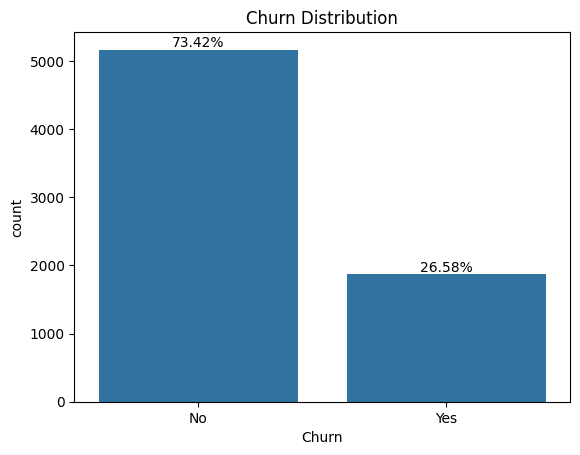

In [381]:
ch_distributio = sns.countplot(x='Churn', data=data)

total = len(data)  
for p in ch_distributio.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'  
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ch_distributio.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Churn Distribution')
plt.show()

26.54% of the customers have left within the last month.

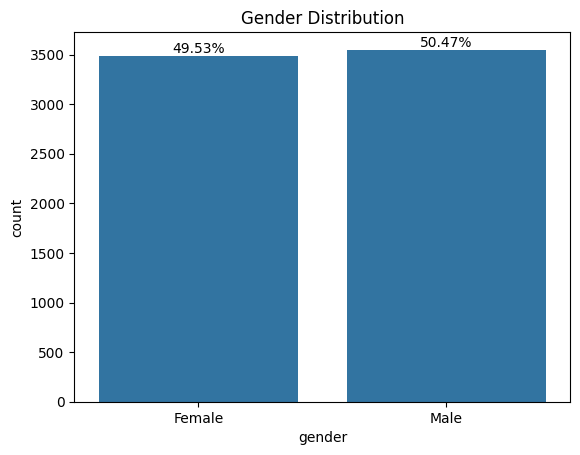

In [382]:
gn_distribution = sns.countplot(x='gender', data=data)

for p in gn_distribution.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'  
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    gn_distribution.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Gender Distribution')
plt.show()

The distribution between male and female is practicly uniform.

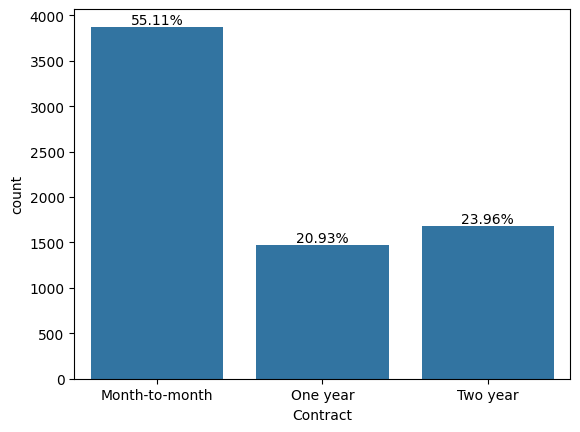

In [383]:
contract_distribution = sns.countplot(x='Contract', data=data)

for p in contract_distribution.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'  
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    contract_distribution.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Over 50% of customer have month-to-month contract.

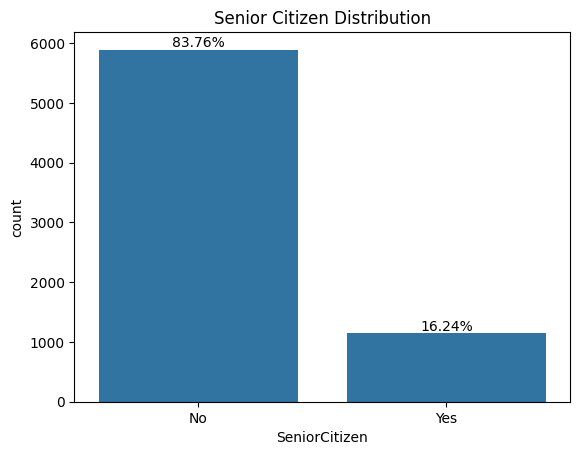

In [384]:
sr_distribution = sns.countplot(x='SeniorCitizen', data=data)

for p in sr_distribution.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'  
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    sr_distribution.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Senior Citizen Distribution')
plt.show()

Only 16.21% of customer are senior citizens and, as can be seen below, most of them left the comapny last month. 

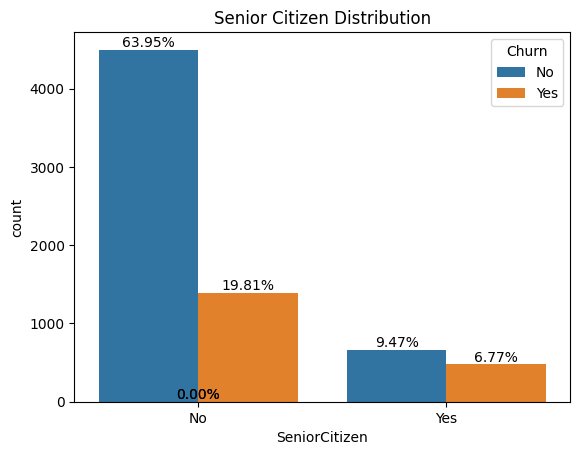

In [385]:
sr_ch_distribution = sns.countplot(x='SeniorCitizen', hue='Churn', data=data)

for p in sr_ch_distribution.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'  
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    sr_ch_distribution.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Senior Citizen Distribution')
plt.show()

In [386]:
data_sc = data[['SeniorCitizen', 'Churn']]
data_sc.groupby(['SeniorCitizen'], as_index=False).value_counts()

,SeniorCitizen,Churn,count
0,No,No,4497
1,No,Yes,1393
2,Yes,No,666
3,Yes,Yes,476


Now let's take a look on the different distributions.

<Axes: xlabel='tenure', ylabel='Count'>

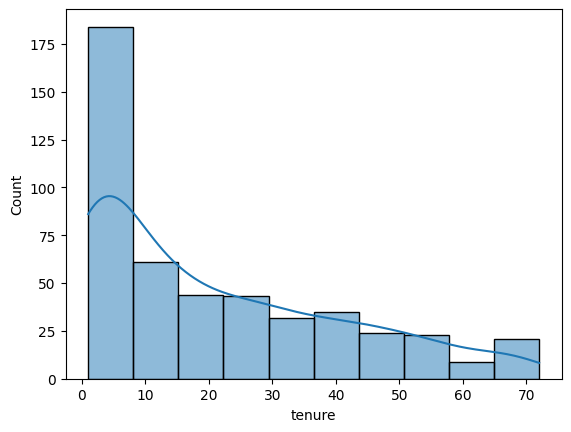

In [387]:
Number_of_month_senior_churn = data[(data['SeniorCitizen'] == 'Yes') & (data['Churn'] == 'Yes')]['tenure']
sns.histplot(Number_of_month_senior_churn, kde=True)

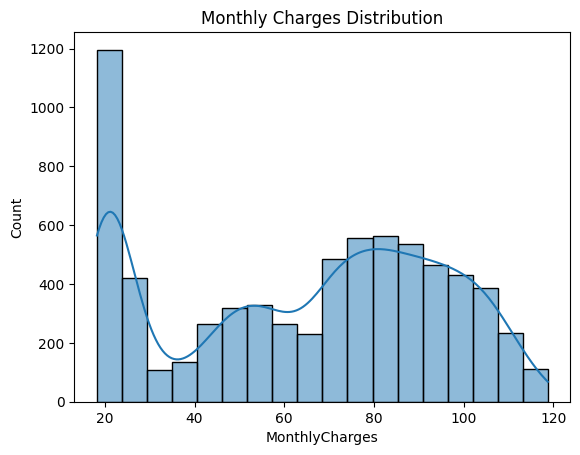

In [388]:
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')
plt.show()

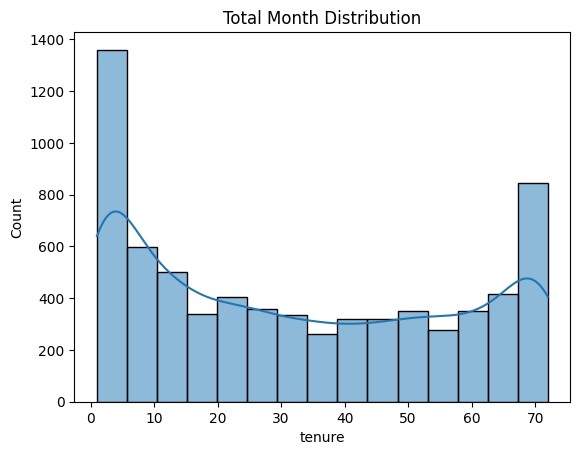

In [389]:
sns.histplot(data['tenure'], kde=True)
plt.title('Total Month Distribution')
plt.show()

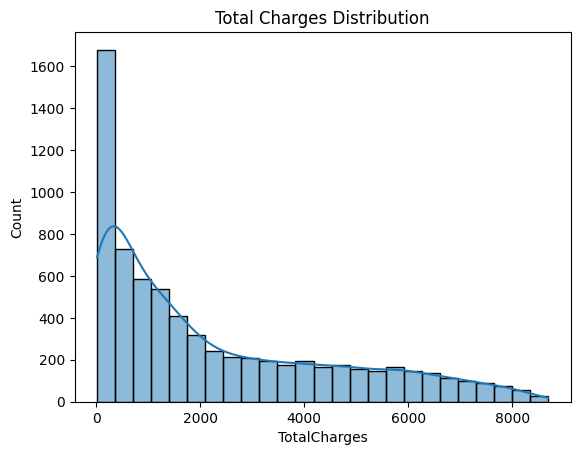

In [390]:
sns.histplot(data['TotalCharges'], kde=True)
plt.title('Total Charges Distribution')
plt.show()

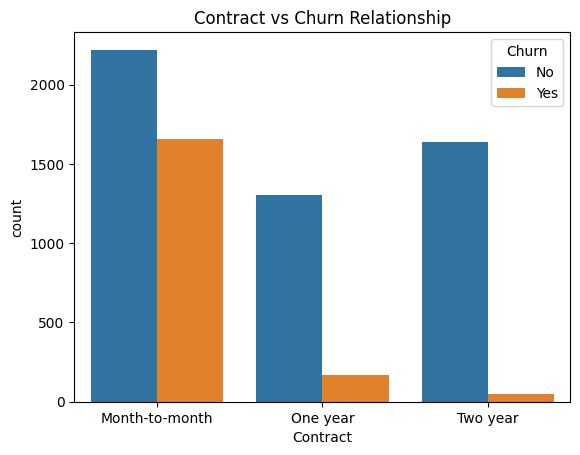

In [391]:
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Contract vs Churn Relationship')
plt.show()

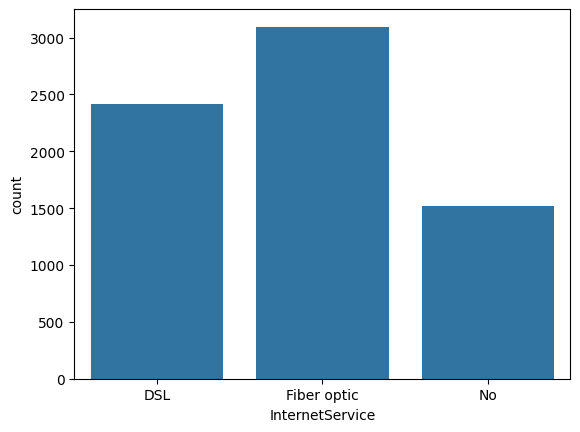

In [392]:
sns.countplot(x='InternetService', data=data)
plt.show()

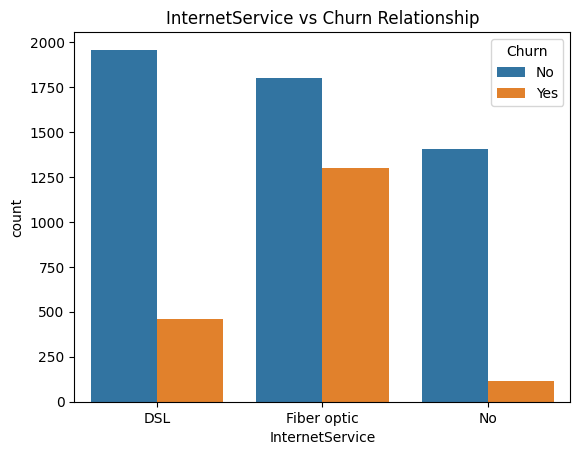

In [393]:
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('InternetService vs Churn Relationship')
plt.show()

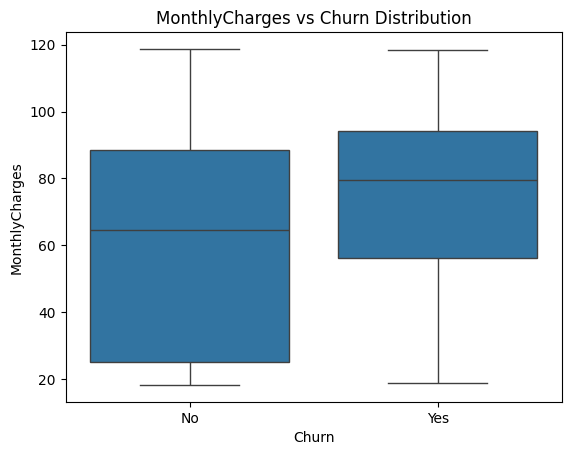

In [394]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('MonthlyCharges vs Churn Distribution')
plt.show()

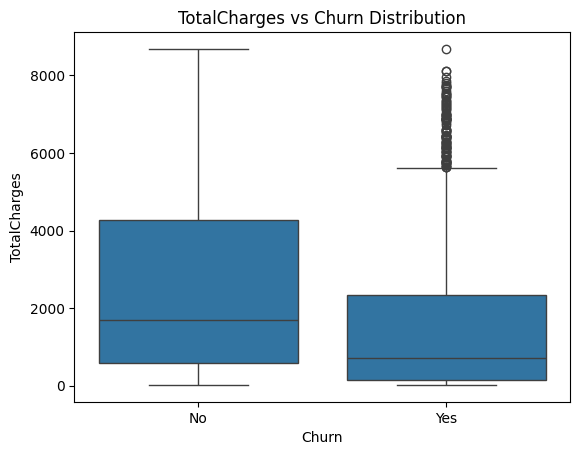

In [395]:
sns.boxplot(x='Churn', y='TotalCharges', data=data)
plt.title('TotalCharges vs Churn Distribution')
plt.show()

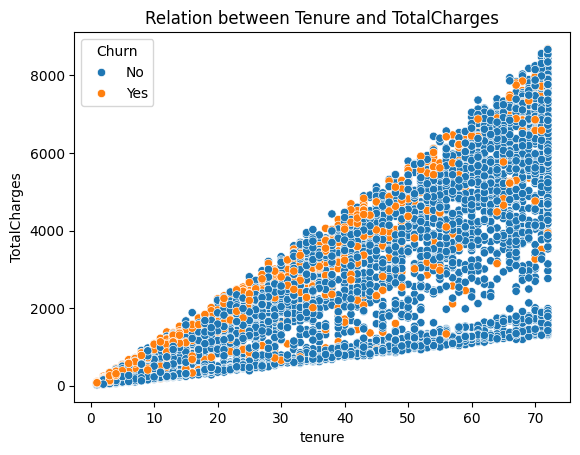

In [396]:
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=data)
plt.title('Relation between Tenure and TotalCharges')
plt.show()

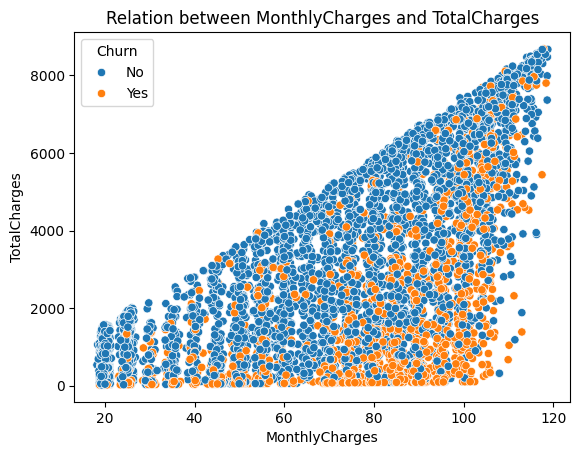

In [397]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=data)
plt.title('Relation between MonthlyCharges and TotalCharges')
plt.show()

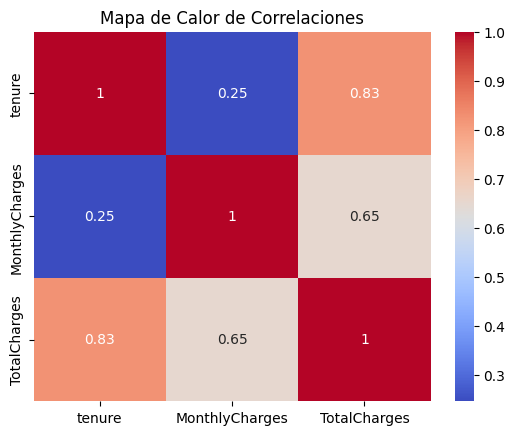

In [398]:
correlation_matrix = data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [402]:
internet_service_data = data[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'Churn']]
internet_service_data.groupby(['InternetService','OnlineSecurity', 'OnlineBackup', 'Churn'], as_index=False).value_counts()

,InternetService,OnlineSecurity,OnlineBackup,Churn,count
0,DSL,No,No,No,518
1,DSL,No,No,Yes,274
2,DSL,No,Yes,No,375
3,DSL,No,Yes,Yes,73
4,DSL,Yes,No,No,473
5,DSL,Yes,No,Yes,69
6,DSL,Yes,Yes,No,591
7,DSL,Yes,Yes,Yes,43
8,Fiber optic,No,No,No,620
9,Fiber optic,No,No,Yes,783


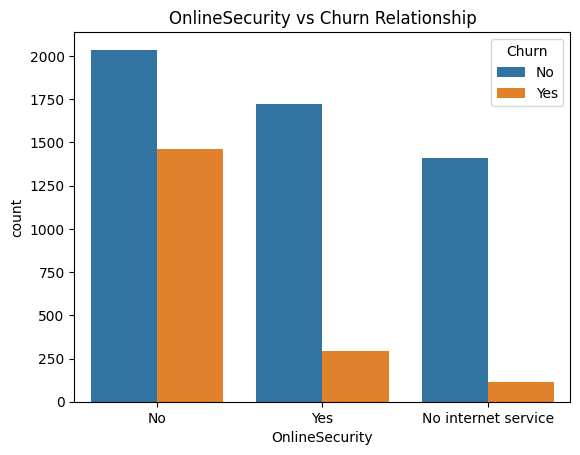

In [403]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=data)
plt.title('OnlineSecurity vs Churn Relationship')
plt.show()

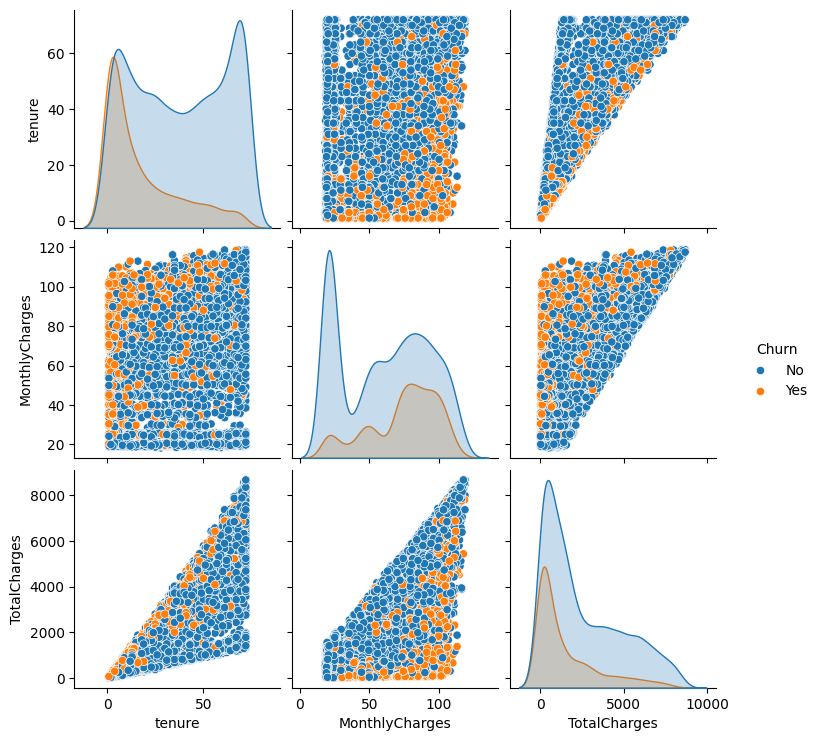

In [399]:
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

### **Key Observations:**

##### **Relationship between Tenure and Churn:**
- Customers with a **short tenure (close to 0)** are more likely to churn.  
- As **tenure increases (tenure > 50)**, the churn rate decreases significantly.  
- This suggests that **new customers are more prone to canceling the service**.


##### **Relationship between MonthlyCharges and Churn:**
- Customers with **high monthly charges (MonthlyCharges > 80)** seem to have a **higher churn rate**.  
- Customers with **lower charges** show a more **uniform distribution**.  
- This could indicate that customers with **higher-cost services are more sensitive to the cost-benefit ratio**.


##### **Relationship between TotalCharges and Churn:**
- There is a **direct linear relationship between TotalCharges and Tenure** (logical, as **TotalCharges = MonthlyCharges × Tenure**).  
- Customers with **low TotalCharges** have a **higher incidence of churn**, which aligns with the pattern observed in tenure.


##### **Individual Distributions:**
- In the **density plots**, customers with **low Tenure and TotalCharges values** dominate the **Churn = Yes** category.  
- Conversely, customers with **higher values for both variables** tend to **stay (Churn = No)**.


### **Conclusions:**
- **New customers** and those with **high monthly costs** are more likely to **cancel the service**.  
- Customers with a **long tenure** and **high total charges** demonstrate **greater loyalty**.  
- Could be interesting to **create specific retention strategies** for **new customers** and **offer more attractive plans** for customers with **high MonthlyCharges**.

## Data Preprocessing 

In [400]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [401]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We need to encode all the cathegorical columns before splitting the data into training and test set.

In [405]:
for column in data.columns:
    if data[column].dtype=='object':
        data[column] = LabelEncoder().fit_transform(data[column])

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [406]:
data.corr()['Churn'].sort_values()

Contract           -0.396150
tenure             -0.354049
OnlineSecurity     -0.289050
TechSupport        -0.282232
TotalCharges       -0.199484
OnlineBackup       -0.195290
DeviceProtection   -0.177883
Dependents         -0.163128
Partner            -0.149982
InternetService    -0.047097
StreamingMovies    -0.038802
StreamingTV        -0.036303
gender             -0.008545
PhoneService        0.011691
MultipleLines       0.038043
PaymentMethod       0.107852
SeniorCitizen       0.150541
PaperlessBilling    0.191454
MonthlyCharges      0.192858
Churn               1.000000
Name: Churn, dtype: float64

As shown above the most correlated atributes with churn column are the contrat, number of months as a customer, the online security and the technical support.

Let's split the data into the training and test set with the trian_test_splt function from the scikit-learn library using 25% of the data as a test set. 

In [411]:
x = data.drop(columns = ['Churn'])
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.25, random_state = 0)

Since the columns tenure, MonthlyCharges and TotalCharges are at different scales, I will use StandardScaler() to have all the varables at the same range.

In [414]:
sc = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3540,0,0,1,1,1.628149,1,0,1,2,2,2,2,2,2,2,1,0,1.460662,2.416469
3504,1,0,1,1,1.464856,1,0,2,1,1,1,1,1,1,2,0,0,-1.495682,-0.392705
6715,0,0,0,0,-0.862073,1,2,1,0,0,2,0,2,0,0,1,2,0.812400,-0.564123
2866,0,0,0,0,-0.821250,1,0,1,0,2,0,0,0,2,0,1,2,0.659083,-0.552154
6609,1,0,0,0,-1.270306,1,0,2,1,1,1,1,1,1,0,1,3,-1.490683,-0.993420


## Model Evaluation and Prediction

We are gonna use different models to choose which performs better.

### Logistic Regression

In [422]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_lr = lr.score(X_test, y_test)
accuracy_lr

0.8048919226393629

In [424]:
lr_predict = lr.predict(X_test)
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1311
           1       0.63      0.55      0.59       447

    accuracy                           0.80      1758
   macro avg       0.74      0.72      0.73      1758
weighted avg       0.80      0.80      0.80      1758



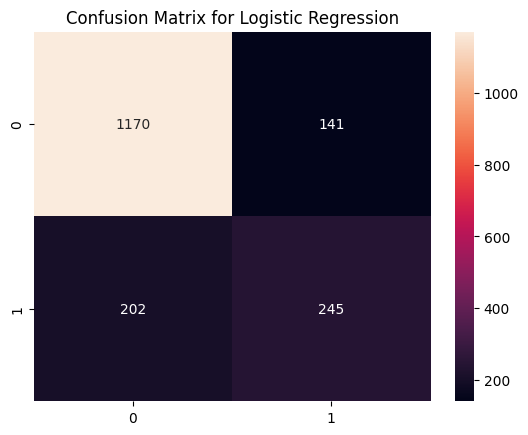

In [436]:
sns.heatmap(confusion_matrix(y_test, lr_predict), annot=True, fmt="d")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

### K-Neighbors Classifier

In [459]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, y_train)
accuracy_KNN = KNN.score(X_test, y_test)
accuracy_KNN

0.7781569965870307

In [460]:
KNN_predict = KNN.predict(X_test)
print(classification_report(y_test, KNN_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1311
           1       0.59      0.43      0.50       447

    accuracy                           0.78      1758
   macro avg       0.70      0.66      0.68      1758
weighted avg       0.76      0.78      0.77      1758



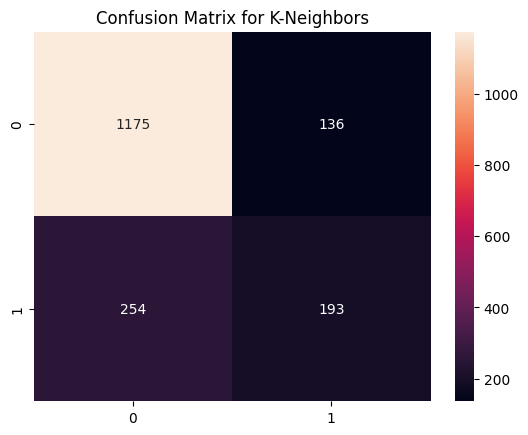

In [461]:
sns.heatmap(confusion_matrix(y_test, KNN_predict), annot=True, fmt="d")
plt.title("Confusion Matrix for K-Neighbors")
plt.show()

In [462]:
accuracy_KNN_array = []
for k in range(1, 20):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    accuracy_KNN = KNN.score(X_test, y_test)
    accuracy_KNN_array.append(accuracy_KNN)

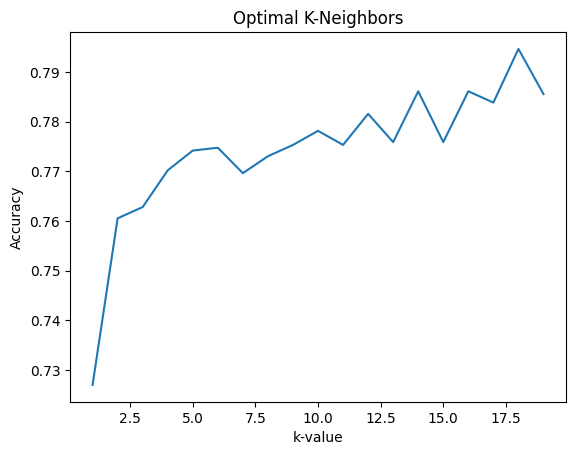

In [481]:
plt.plot(range(1, 20), accuracy_KNN_array)
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.title('Optimal K-Neighbors')
plt.show()

In [464]:
print(np.max(accuracy_KNN_array))
print(np.argmax(accuracy_KNN_array))

0.7946530147895335
17


### SVM

In [465]:
svc = SVC(random_state=1)
svc.fit(X_train, y_train)
accuracy_svc = svc.score(X_test, y_test)
accuracy_svc

0.8031854379977247

In [466]:
svc_predict = svc.predict(X_test)
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1311
           1       0.66      0.48      0.55       447

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.71      1758
weighted avg       0.79      0.80      0.79      1758



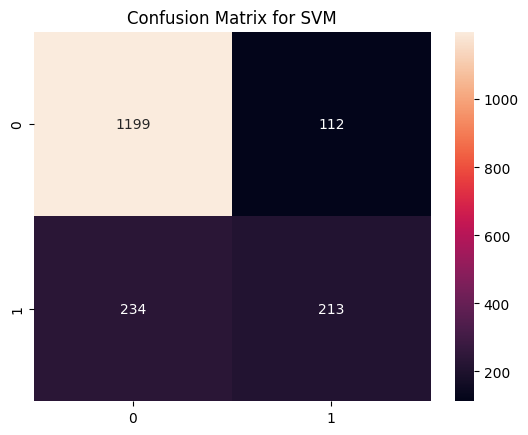

In [467]:
sns.heatmap(confusion_matrix(y_test, svc_predict), annot=True, fmt="d")
plt.title("Confusion Matrix for SVM")
plt.show()

### Random Forest

In [472]:
random_forest = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
random_forest.fit(X_train, y_train)
accuracy_random_forest = random_forest.score(X_test, y_test)
accuracy_random_forest

0.8094425483503982

In [473]:
random_forest_predict = random_forest.predict(X_test)
print(classification_report(y_test, random_forest_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1311
           1       0.67      0.49      0.56       447

    accuracy                           0.81      1758
   macro avg       0.76      0.70      0.72      1758
weighted avg       0.80      0.81      0.80      1758



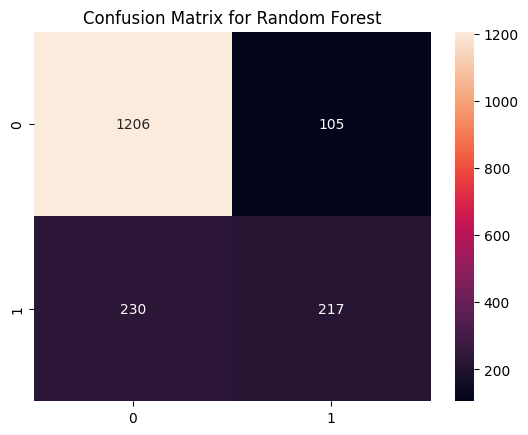

In [474]:
sns.heatmap(confusion_matrix(y_test, random_forest_predict), annot=True, fmt="d")
plt.title("Confusion Matrix for Random Forest")
plt.show()

### Decision Tree Classifier

In [475]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
accuracy_decision_tree = decision_tree.score(X_test, y_test)
accuracy_decision_tree

0.7053469852104665

In [476]:
decision_tree_predict = decision_tree.predict(X_test)
print(classification_report(y_test, decision_tree_predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1311
           1       0.42      0.43      0.42       447

    accuracy                           0.71      1758
   macro avg       0.61      0.61      0.61      1758
weighted avg       0.71      0.71      0.71      1758



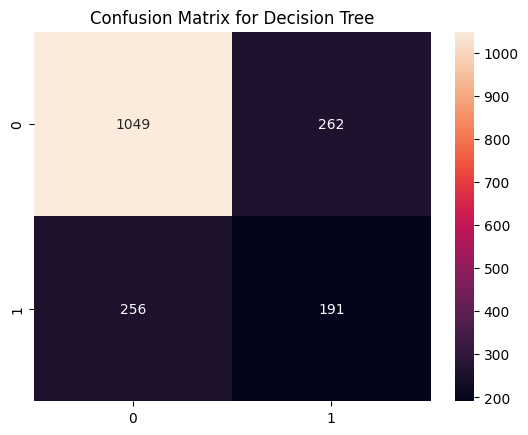

In [477]:
sns.heatmap(confusion_matrix(y_test, decision_tree_predict), annot=True, fmt="d")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

### Gradient Boosting Classifier

In [478]:
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train, y_train)
accuracy_gradient_boost = gradient_boost.score(X_test, y_test)
accuracy_gradient_boost

0.8020477815699659

In [479]:
gradient_boost_predict = gradient_boost.predict(X_test)
print(classification_report(y_test, gradient_boost_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1311
           1       0.65      0.49      0.56       447

    accuracy                           0.80      1758
   macro avg       0.74      0.70      0.71      1758
weighted avg       0.79      0.80      0.79      1758



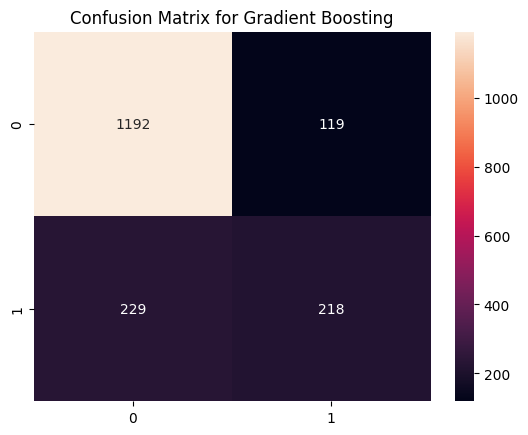

In [480]:
sns.heatmap(confusion_matrix(y_test, gradient_boost_predict), annot=True, fmt="d")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

## **Project Conclusion**

After comparing multiple classification algorithms, the results reveal clear differences in the performance of each model. Below is a summary of the key findings:



### **Key Results Summary**

| **Model**           | **Precision Class 0** | **Precision Class 1** | **Recall Class 0** | **Recall Class 1** | **F1-Score Class 0** | **F1-Score Class 1** | **Accuracy** |
|-----------------------|-----------------------|-----------------------|-------------------|-------------------|---------------------|---------------------|-------------|
| **Logistic Regression** | 0.85                 | 0.63                 | 0.89              | 0.55              | 0.87                | 0.59                | 0.80        |
| **KNeighborsClassifier** | 0.82                 | 0.59                 | 0.90              | 0.43              | 0.86                | 0.50                | 0.78        |
| **SVM**             | 0.84                 | 0.66                 | 0.91              | 0.48              | 0.87                | 0.55                | 0.80        |
| **Random Forest**   | 0.84                 | 0.67                 | 0.92              | 0.49              | 0.88                | 0.56                | 0.81        |
| **Decision Tree**   | 0.80                 | 0.42                 | 0.80              | 0.43              | 0.80                | 0.42                | 0.71        |
| **Gradient Boosting** | 0.84                 | 0.65                 | 0.91              | 0.49              | 0.87                | 0.56                | 0.80        |


### **Results Interpretation**

1. **Best Overall Model: Random Forest**  
   - **Accuracy:** 81%  
   - **F1-Score Class 0:** 0.88  
   - **F1-Score Class 1:** 0.56  
   Random Forest offers the best balance between precision, recall, and F1-score, especially for the majority class (Class 0). However, its performance for the minority class (Class 1) can still be improved.

2. **Competitive Models:** Logistic Regression, SVM, and Gradient Boosting  
   - All show very similar overall performance (accuracy ≈ 80%).  
   - They perform well for Class 0 but still struggle with Class 1.  

3. **Worst Performance: Decision Tree**  
   - **Accuracy:** 71%  
   - Lowest F1-Score in both classes.  
   - It may be overfitting the training data.

4. **KNeighborsClassifier:**  
   - While the overall performance isn't so bad (78% accuracy), its inability to correctly capture Class 1 (recall 0.43) puts it at a disadvantage compared to other models.  
   - The "Optimal K-Neighbors" graph shows improvement with higher *k*-values but still falls short of other models.
